# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### Loading the Credit Card Transactions Dataset for Analysis

In [2]:
df=pd.read_csv("/kaggle/input/credit-card-dataset/creditcard.csv")

# Explore Data

### Previewing the Credit Card Transactions Dataset

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Overview and Column Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Dataset Dimensions (Rows and Columns)

In [5]:
df.shape

(284807, 31)

### Listing the Dataset's Column Names

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Checking for Missing Values in the Dataset

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Counting Duplicate Rows in the Dataset

In [8]:
df.duplicated().sum()

1081

### Removing Duplicate Rows from the Dataset

In [9]:
df=df.drop_duplicates()

### Verifying if Duplicates Have Been Successfully Removed

In [10]:
df.duplicated().sum()

0

### Statistical Summary of the Dataset

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Data Analysis

### Visualizing Distribution of Features (Excluding Time, Amount, and Class)

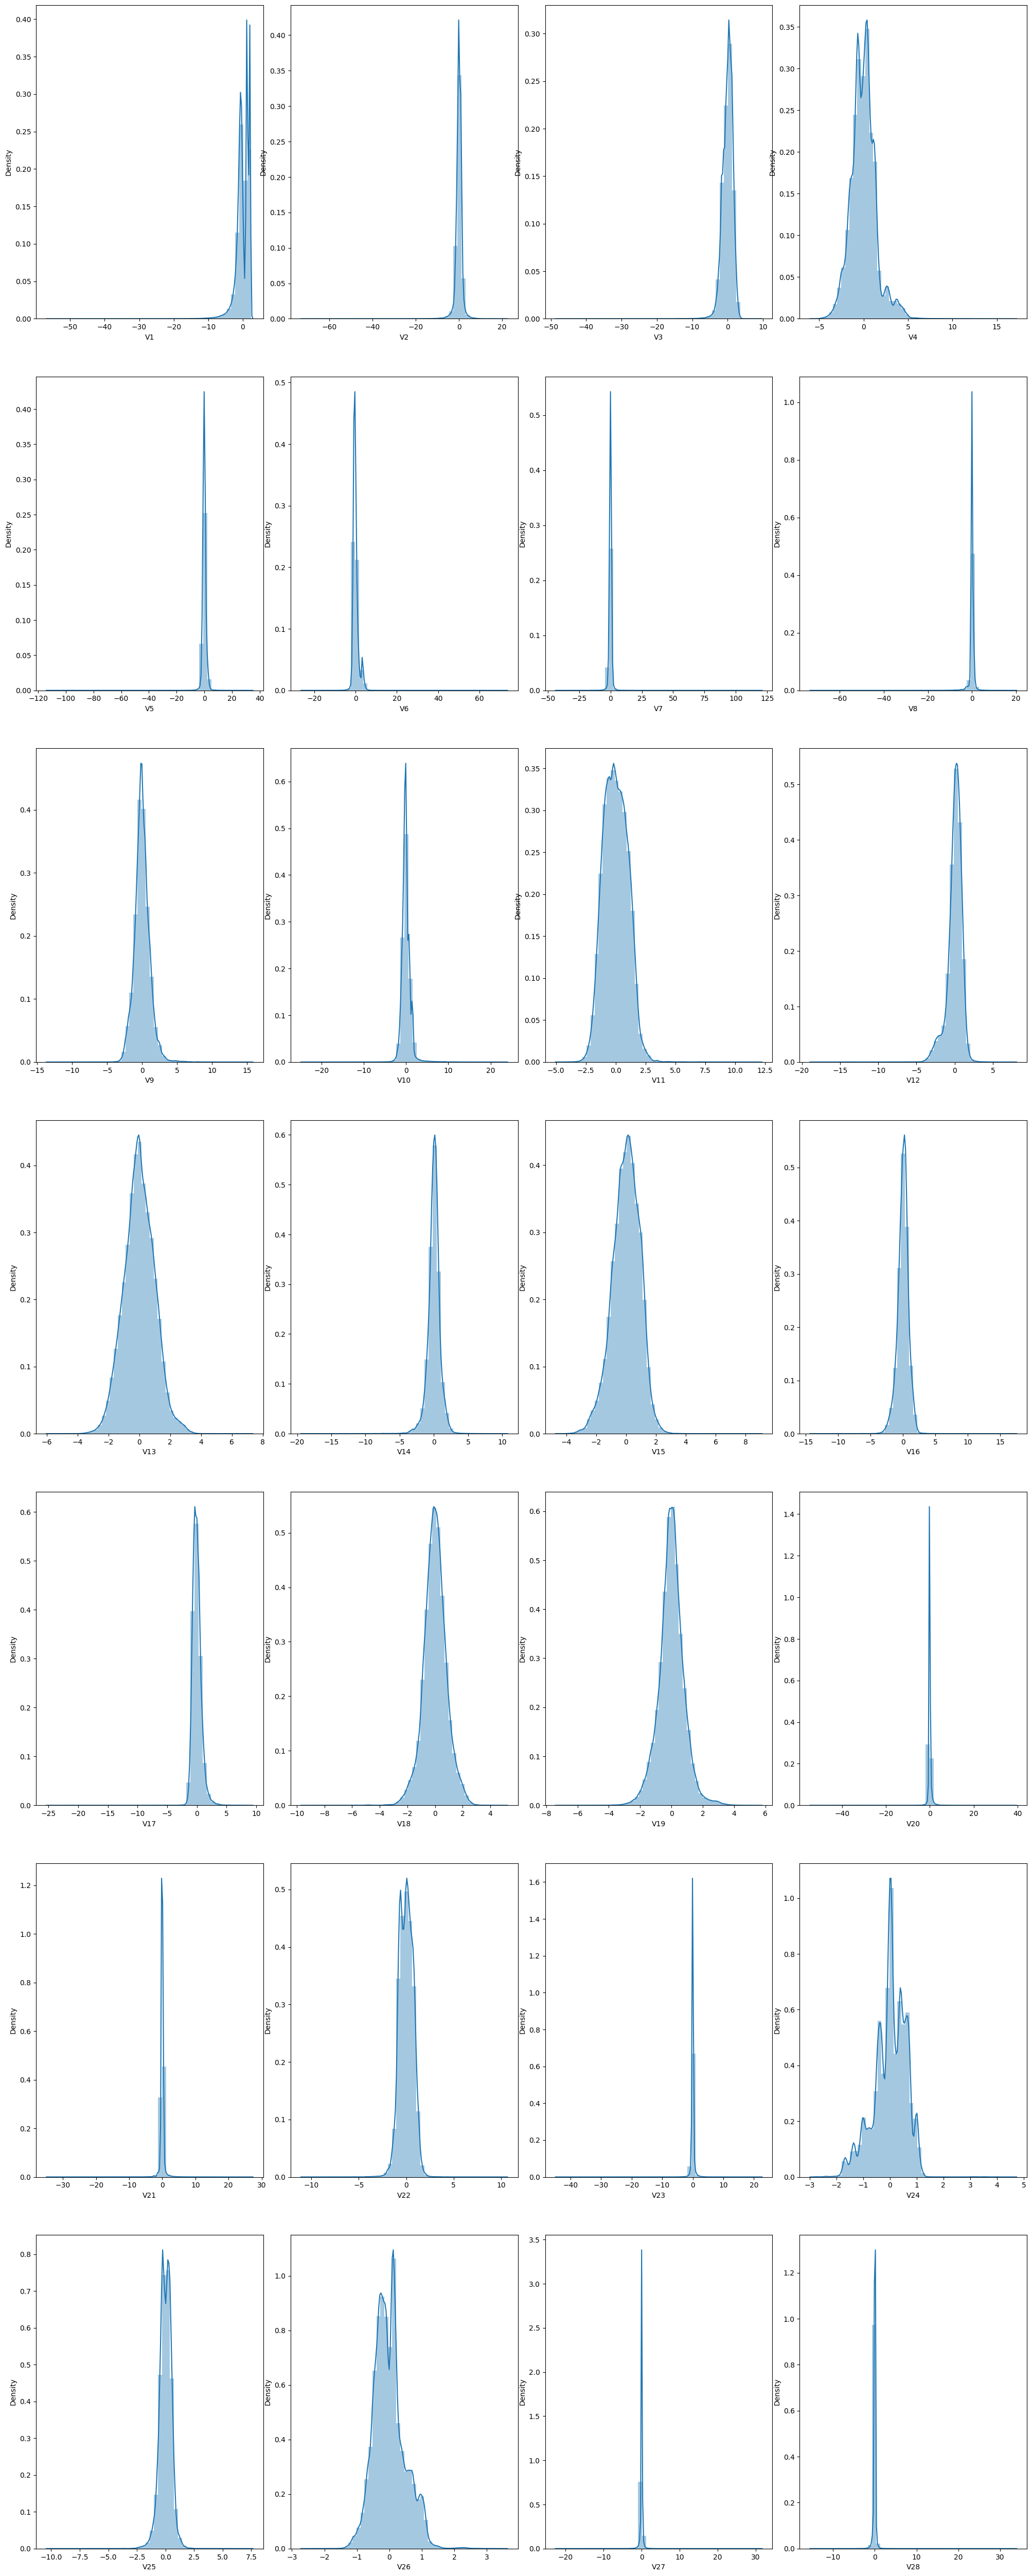

In [12]:
df_temp=df.drop(columns=["Time","Amount","Class"],axis=1)
fig,ax=plt.subplots(ncols=4,nrows=7,figsize=(20,50))
index=0
ax=ax.flatten()
for col in df_temp:
    sns.distplot(df_temp[col],ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=-0.5,h_pad=5)

### Visualizing the Distribution of the 'Time' Feature

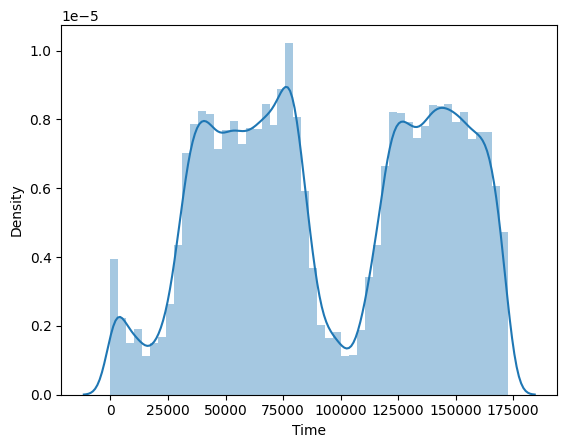

In [13]:
sns.distplot(df["Time"])
plt.show()

### Visualizing the Distribution of the 'Amount' Featur

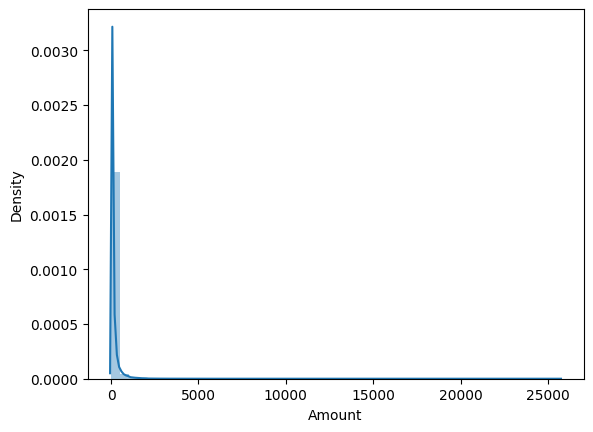

In [14]:
sns.distplot(df["Amount"])
plt.show()

### Correlation Heatmap of Features in the Dataset

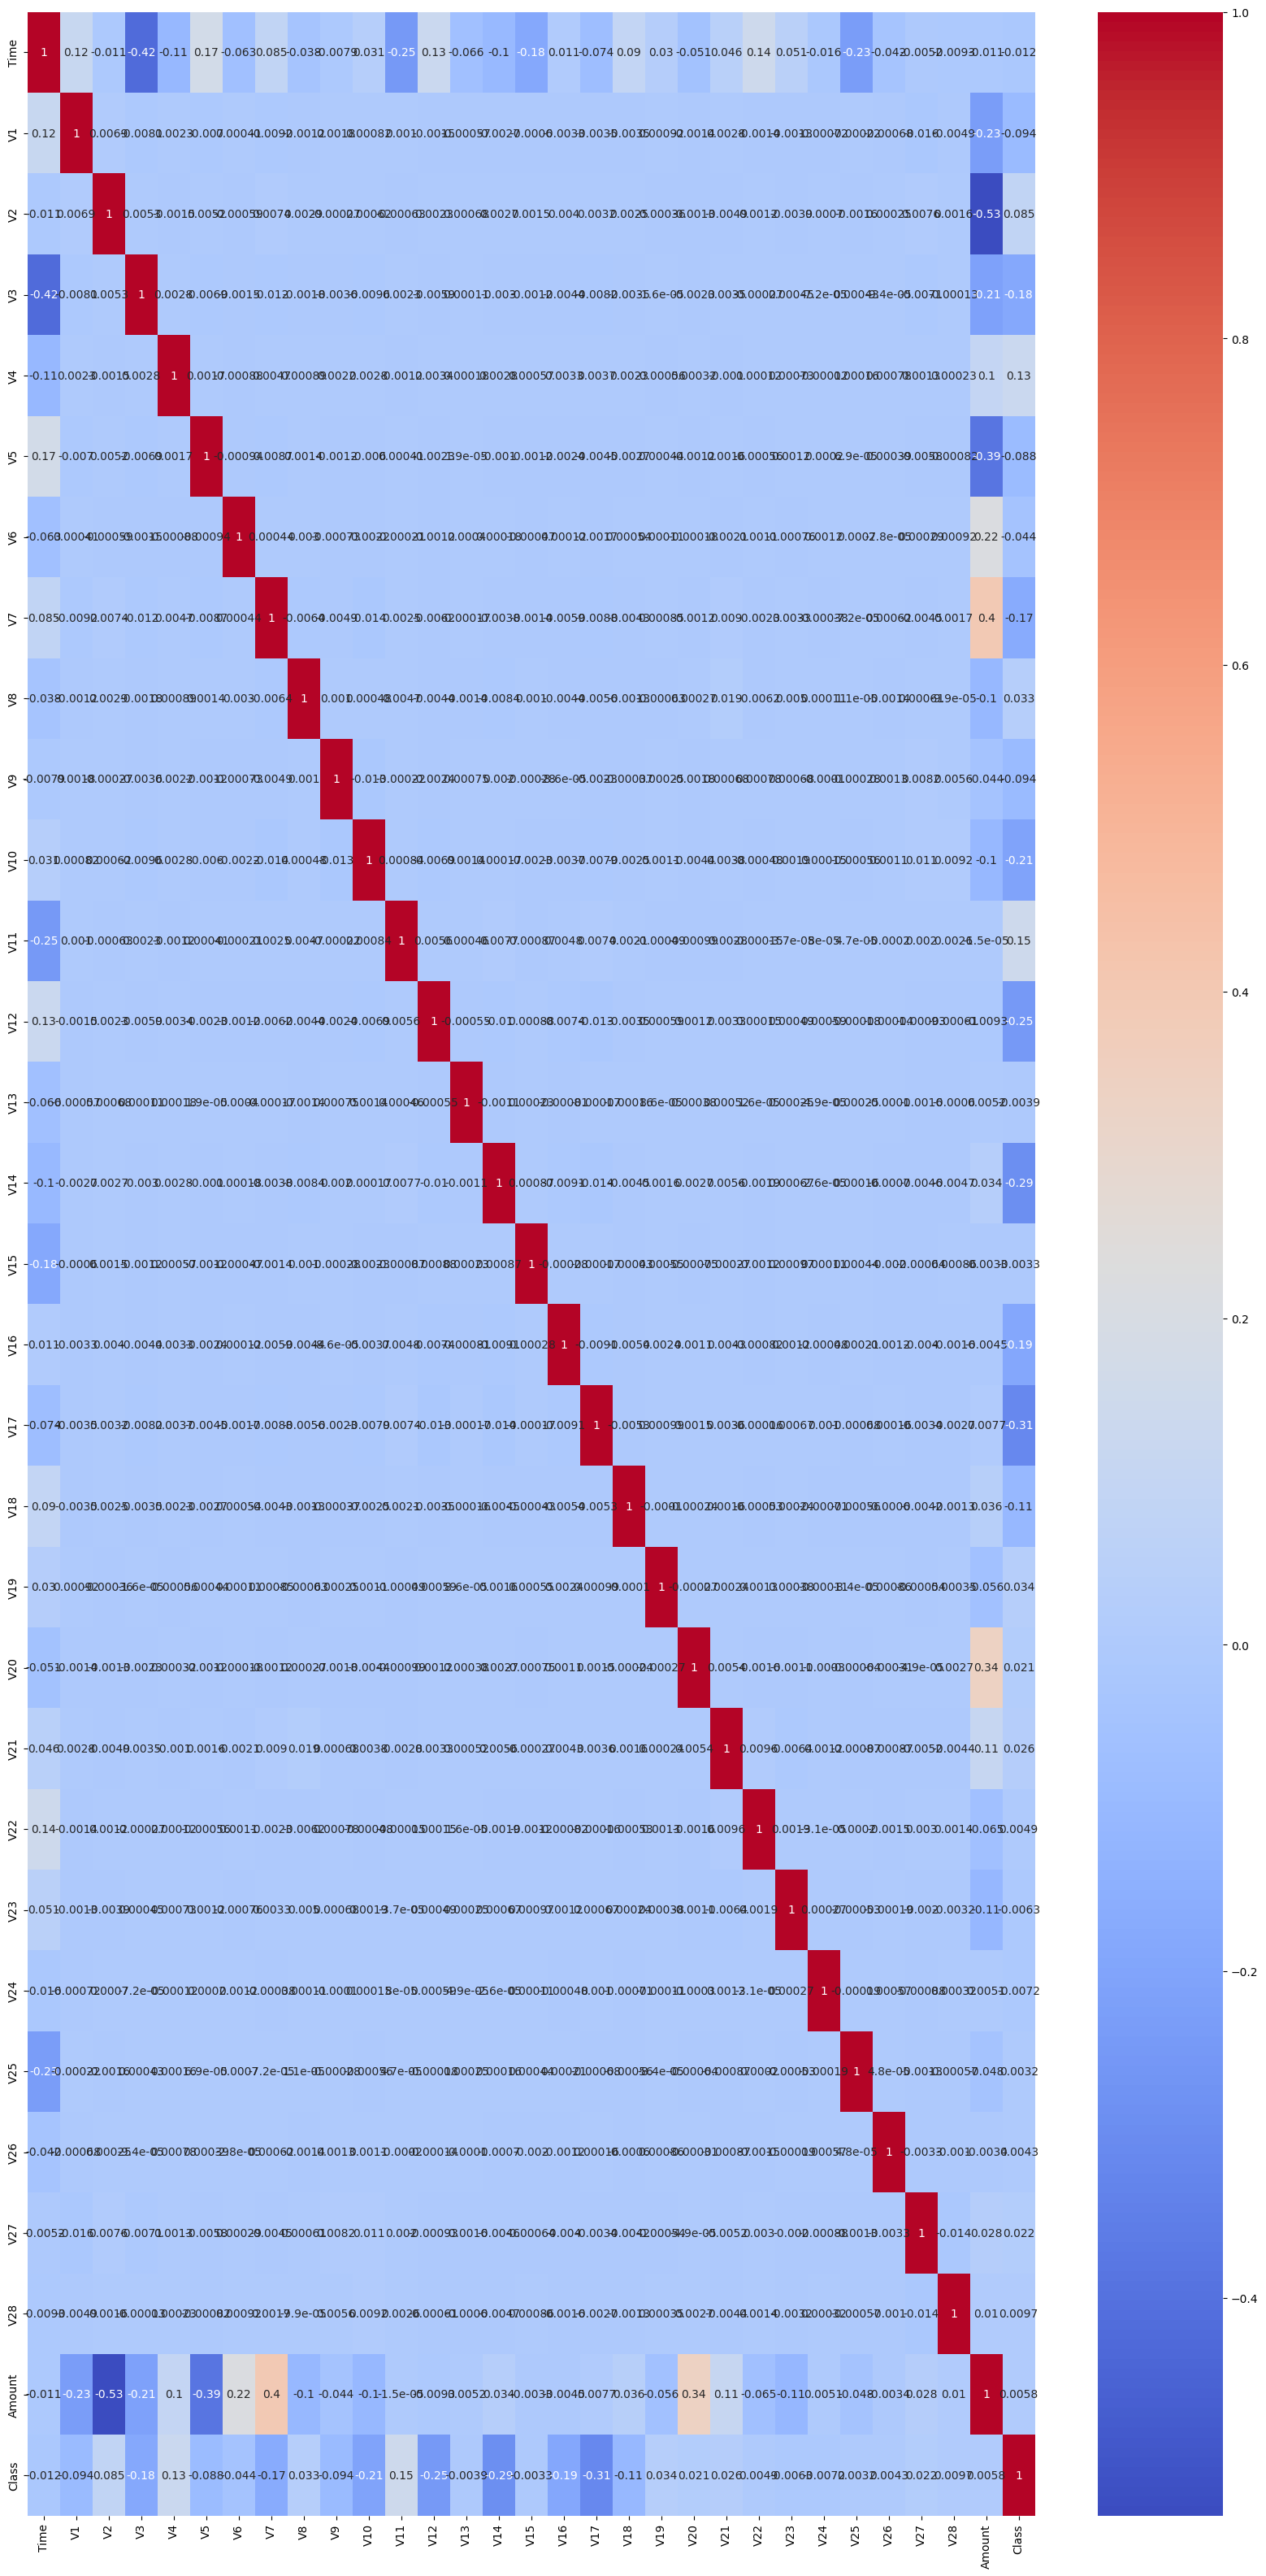

In [15]:
cor=df.corr()
plt.figure(figsize=(20,40))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

# Building Model

### Splitting the Dataset into Features (X) and Target (y)

In [16]:
x=df.drop(columns=["Class"],axis=1)
y=df["Class"]

### Standardizing the Features using StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaler=sc.fit_transform(x)

### Accessing the Last Row of Scaled Features

In [18]:
x_scaler[-1]

array([ 1.64236181, -0.27686005, -0.1127094 ,  0.46512487, -0.35589839,
       -0.01043804, -0.48687097,  1.28309413, -0.35095639,  0.44525779,
       -0.84910935, -1.02153857, -0.03096322, -0.18956298, -0.08881285,
        0.04403866, -0.34769819, -0.78402639,  0.19813651, -0.31455594,
        0.49710317,  0.36113414,  0.88757737,  0.60378078,  0.01417241,
       -0.90828607, -1.69777619, -0.01055821,  0.03994074,  0.51329005])

### Splitting the Data into Training and Testing Sets

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=42,stratify=y)

### Displaying the Shapes of the Training and Testing Sets

In [20]:
print(f"The Shape Of x_train = {x_train.shape}")
print(f"The Shape Of x_test = {x_test.shape}")
print(f"The Shape Of y_train = {y_train.shape}")
print(f"The Shape Of y_test = {y_test.shape}")

The Shape Of x_train = (212794, 30)
The Shape Of x_test = (70932, 30)
The Shape Of y_train = (212794,)
The Shape Of y_test = (70932,)


### Initializing Classification Models: Logistic Regression, Random Forest, and Gradient Boosting

In [21]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model3=GradientBoostingClassifier()

### Defining a Function to Train and Evaluate Classification Models

In [22]:
def models(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("f1_score : ",f1_score(y_test,y_pred) )
    print("The Accuracy For The Model Is = " ,model.score(x_train,y_train))
    

### Evaluating the Logistic Regression Model

In [23]:
models(model1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.84      0.59      0.70       118

    accuracy                           1.00     70932
   macro avg       0.92      0.80      0.85     70932
weighted avg       1.00      1.00      1.00     70932

f1_score :  0.6965174129353234
The Accuracy For The Model Is =  0.9992527984811602


### Evaluating the Random Forest Classifier Model

In [24]:
models(model2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.96      0.75      0.84       118

    accuracy                           1.00     70932
   macro avg       0.98      0.88      0.92     70932
weighted avg       1.00      1.00      1.00     70932

f1_score :  0.8436018957345972
The Accuracy For The Model Is =  1.0


### Evaluating the Gradient Boosting Classifier Model

In [25]:
models(model3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.83      0.73      0.77       118

    accuracy                           1.00     70932
   macro avg       0.91      0.86      0.89     70932
weighted avg       1.00      1.00      1.00     70932

f1_score :  0.7747747747747747
The Accuracy For The Model Is =  0.999421976183539


# Data Preprocessing

### Visualizing the Distribution of Target Classes in the Training Set

Class
0    212439
1       355
Name: count, dtype: int64
********************************************************************************


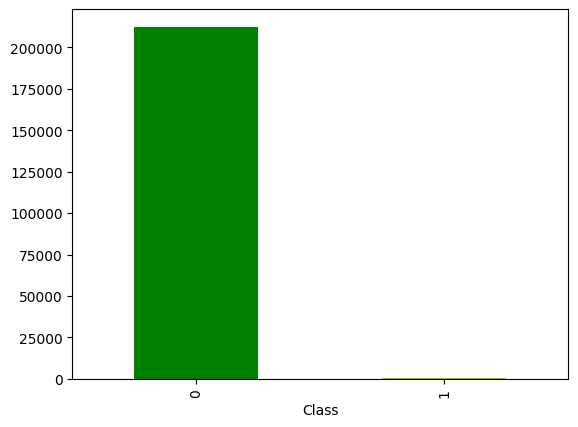

In [26]:
print(y_train.value_counts())
print("********************************************************************************")
y_train.value_counts().plot(kind="bar",color=['green',"y"])
plt.show()

### Applying SMOTE for Oversampling the Training Set to Address Class Imbalance

In [27]:
over_sample=SMOTE()
x_smote,y_smote=over_sample.fit_resample(x_train,y_train)

### Visualizing the Distribution of Target Classes After SMOTE Oversampling

Class
0    212439
1    212439
Name: count, dtype: int64
*******************************************************************************


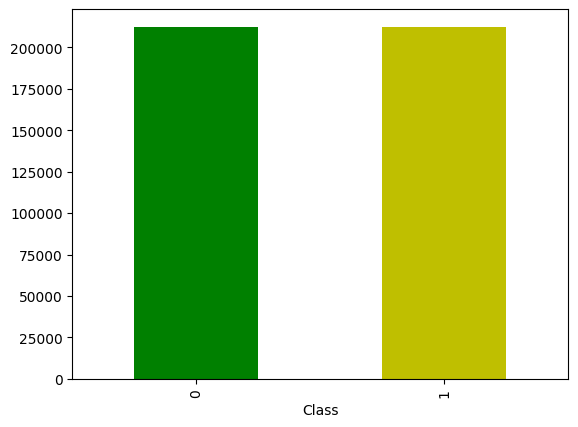

In [28]:
print(y_smote.value_counts())
print("*******************************************************************************")
y_smote.value_counts().plot(kind="bar",color=['green',"y"])
plt.show()

### Initializing Lists to Store Model Evaluation Results

In [29]:
models_for_data=["LogisticRegression","RandomForestClassifier", "GradientBoostingClassifier"]
result1=[]
result2=[]
result3=[]

### Defining a Function to Train, Evaluate, and Store Results for Multiple Model

In [30]:
def models(model):
    model.fit(x_smote,y_smote)
    pred= model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    print(classification_report(y_test,pred))
    print("*************************************************************************************************")
    print(model)
    print("*********************")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("*******************************************************************************************")
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")

### Evaluating the Logistic Regression Model After SMOTE Oversampling

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.88      0.10       118

    accuracy                           0.97     70932
   macro avg       0.53      0.93      0.54     70932
weighted avg       1.00      0.97      0.98     70932

*************************************************************************************************
LogisticRegression()
*********************
Accuracy: 0.9720718434557041
Recall: 0.9267894694767338
F1 Score: 0.5404188163428072
*******************************************************************************************


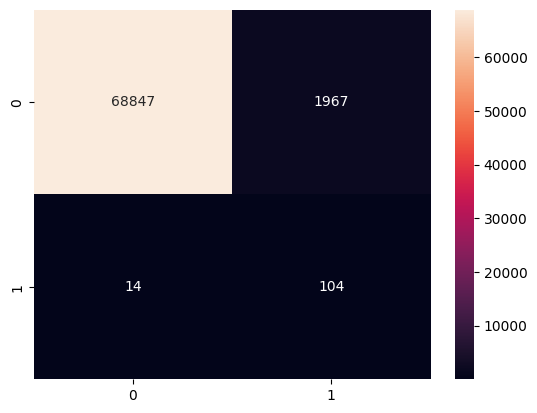

In [31]:
models(model1)

### Evaluating the Random Forest Classifier Model After SMOTE Oversampling

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.89      0.76      0.82       118

    accuracy                           1.00     70932
   macro avg       0.95      0.88      0.91     70932
weighted avg       1.00      1.00      1.00     70932

*************************************************************************************************
RandomForestClassifier()
*********************
Accuracy: 0.999450177634918
Recall: 0.8812782639457006
F1 Score: 0.9108212359956422
*******************************************************************************************


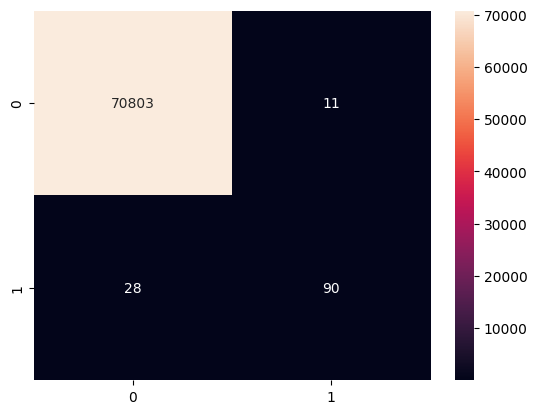

In [32]:
models(model2)

### Evaluating the Gradient Boosting Classifier Model After SMOTE Oversampling

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70814
           1       0.12      0.86      0.21       118

    accuracy                           0.99     70932
   macro avg       0.56      0.93      0.60     70932
weighted avg       1.00      0.99      0.99     70932

*************************************************************************************************
GradientBoostingClassifier()
*********************
Accuracy: 0.9888907686234704
Recall: 0.9267524902908695
F1 Score: 0.6000257154057951
*******************************************************************************************


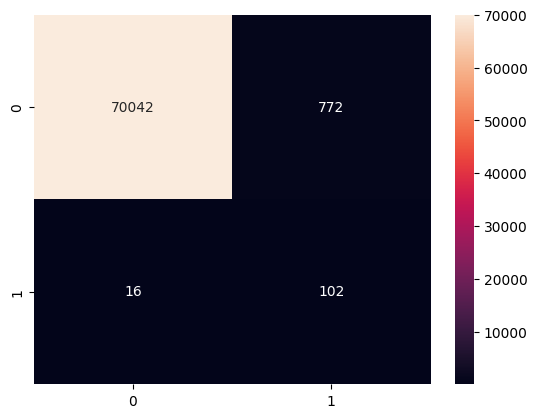

In [33]:
models(model3)

# Model Evaluation

### Displaying the Evaluation Metrics for All Models

In [34]:
print("Accuracies is :" ,result1)
print("recall is :",result2)
print("f1_score is :",result3)

Accuracies is : [0.9720718434557041, 0.999450177634918, 0.9888907686234704]
recall is : [0.9267894694767338, 0.8812782639457006, 0.9267524902908695]
f1_score is : [0.5404188163428072, 0.9108212359956422, 0.6000257154057951]


### Displaying the Final Evaluation Results for All Models in a DataFrame

In [35]:
FinalResult=pd.DataFrame({"Algorithms":models_for_data,"Accuracies":result1,"Recall_Score":result2,"F1_Score":result3})
FinalResult

,Algorithms,Accuracies,Recall_Score,F1_Score
0,LogisticRegression,0.972072,0.926789,0.540419
1,RandomForestClassifier,0.999450,0.881278,0.910821
2,GradientBoostingClassifier,0.988891,0.926752,0.600026


### Plotting the Performance Metrics (Accuracy, Recall, F1 Score) for Each Algorithm

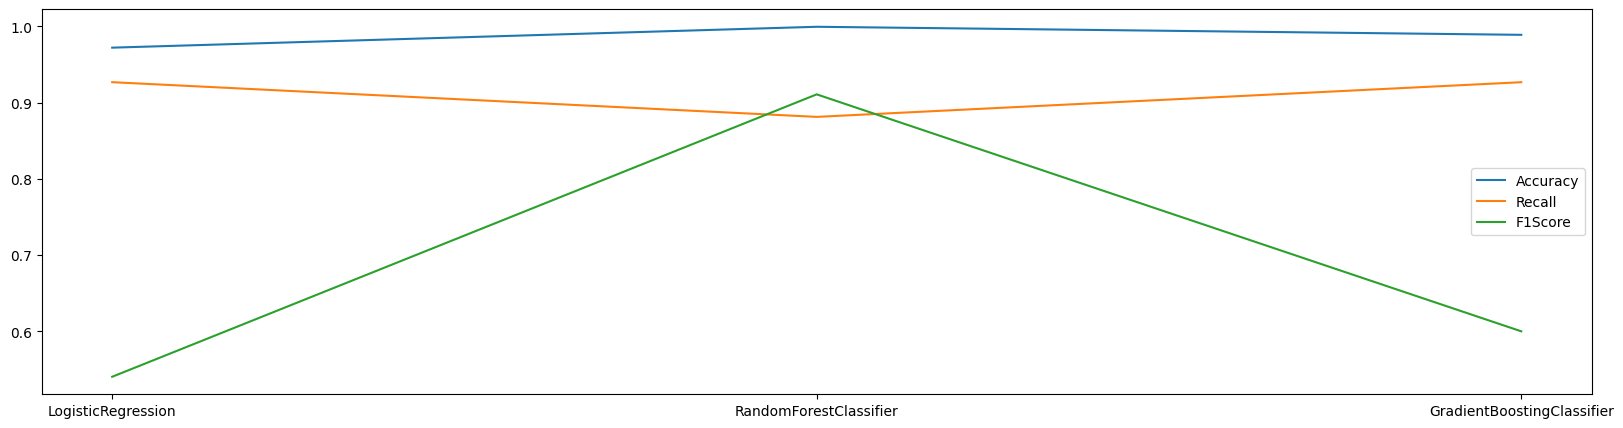

In [36]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult["Algorithms"],result1,label="Accuracy")
plt.plot(FinalResult["Algorithms"],result2,label="Recall")
plt.plot(FinalResult["Algorithms"],result3,label="F1Score")
plt.legend()
plt.show()